# **RESTAURAÇÃO DE IMAGENS**

A restauração de imagens é a tarefa, que engloba a restaurar de partes da imagens que não assumem valores de seus objetos de determinadas partes, como uma parte de uma fotografia antiga, que foi rasurada. Para isso, fazemos algumas operações de processamento de imagem clássicas.

Etapas para isso: 

1. Carregamento da Imagem e Máscara

2. Pré-processamento da Máscara

3. Aplicação do Inpainting com algum algoritmo.


### Fast Marching Method (FMM) - Telea (2004)

- Usado em cv2.INPAINT_TELEA, é baseado em uma analogia geométrica para propagar informações das bordas das regiões válidas para o interior das áreas danificadas.

**Princípio Básico**

- Propagação de Frente de Onda: Trata a região danificada como um "fogo" que se propaga a partir das bordas não danificadas para o interior, priorizando pixels mais próximos das bordas.

- Equação do Tipo Eikonal: Usada para calcular o "tempo de chegada" da frente de onda (propagação) a cada pixel danificado.

Passos do algoritmo:

1. Inicialização:

    - Define a fronteira da região danificada como pontos iniciais.
    - Atribui um "tempo de chegada" zero a esses pontos.

2. Propagação:

    - A cada passo, o pixel com menor "tempo de chegada" é processado.
    - Seu valor é interpolado usando vizinhos válidos (não danificados), ponderando pela direção do gradiente e intensidade.

3. Atualização:

    - Atualiza os tempos de chegada dos pixels vizinhos e repete até preencher toda a região.

    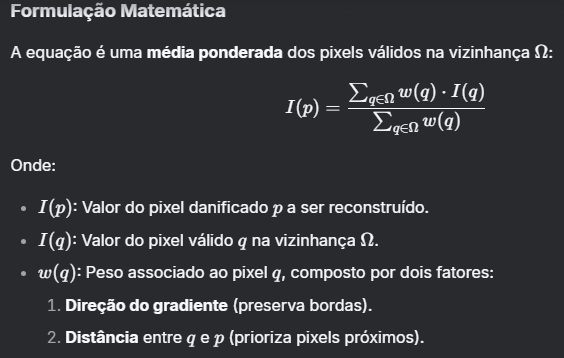

    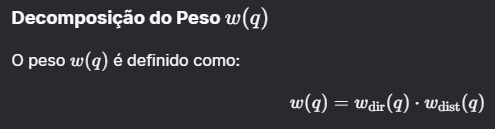

    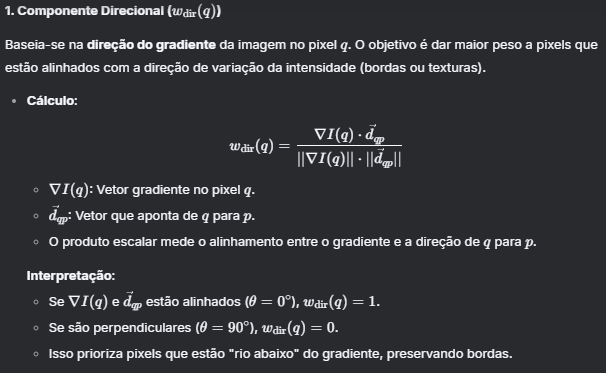

    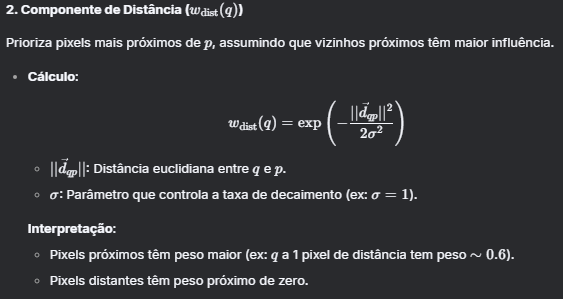


### Método de Navier-Stokes (NS) - Bertalmio et al. (2000)

Implementado em cv2.INPAINT_NS, é inspirado nas equações de fluidos (Navier-Stokes) e proposto por Bertalmio et al. (2000). A ideia é tratar a imagem como um "fluido" que preenche as lacunas de forma suave.

**Princípio básico**

Equação de Transporte: A intensidade do pixel é "transportada" para a região danificada seguindo o campo de gradientes.

Equação de Continuidade: Garante que a reconstrução seja suave e coerente.

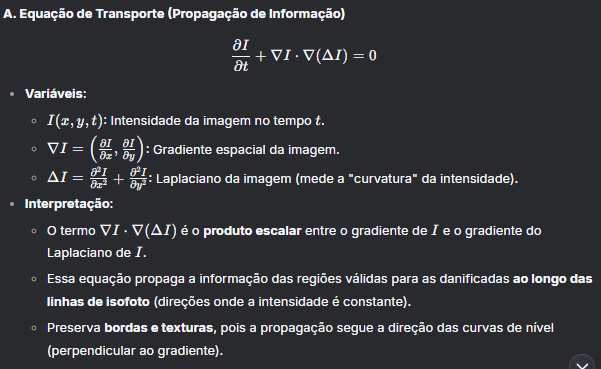

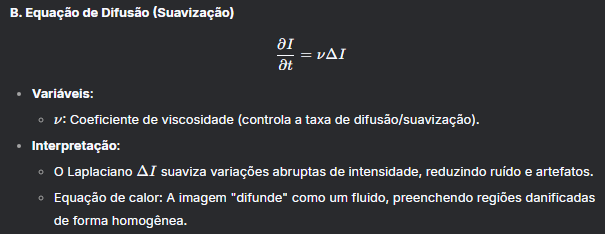

Passos do Algoritmo:

1. Inicialização:

    - 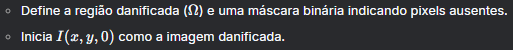

    - 

2. Transporte (Passo de Propagação):

    - 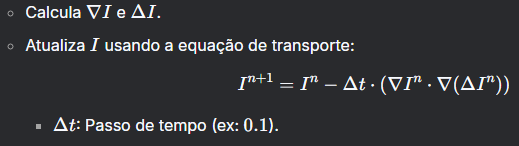


3. Difusão (Passo de Suavização):

    - 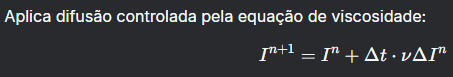


4. Iteração:

    - Repete os passos 2 e 3 até convergir (ex: após 100−1000 iterações)




--------------------------------------------------------------------------------------------------------------

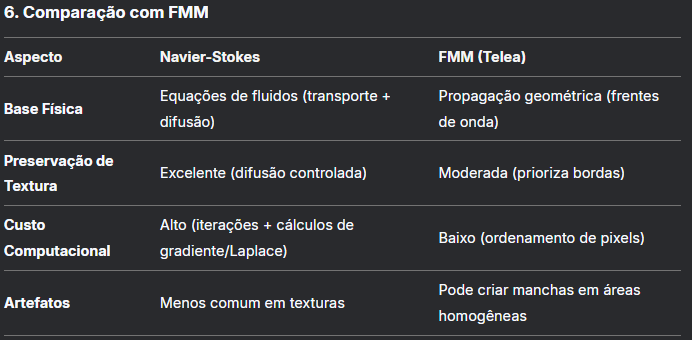


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

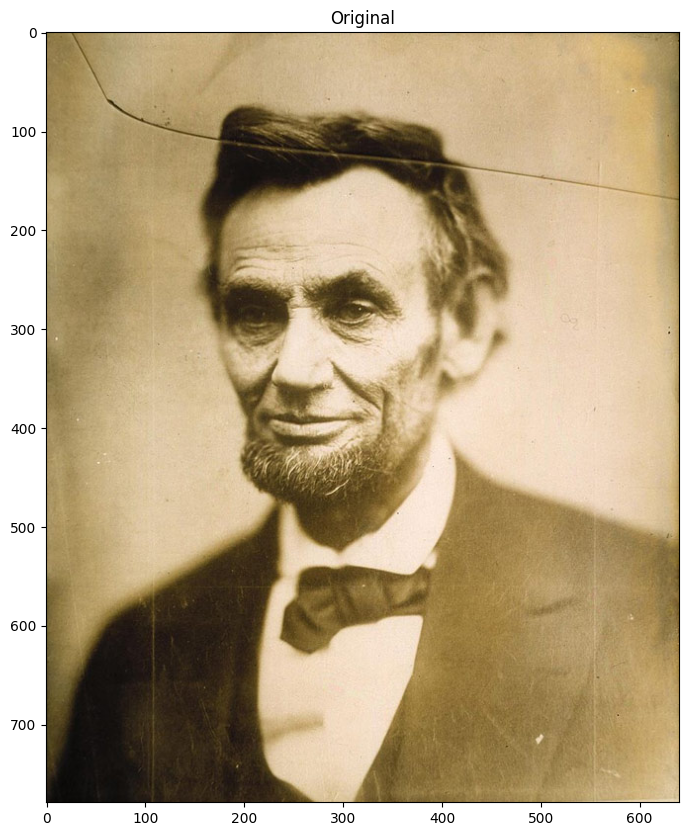

In [10]:
image = cv2.imread("../../images/abraham.jpg")

imshow("Original", image)

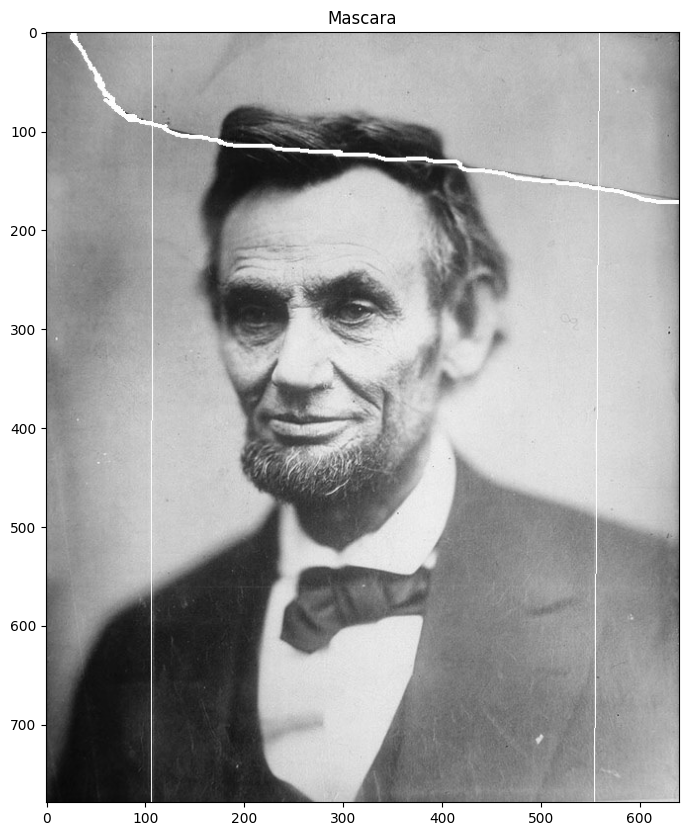

In [14]:
mascara = cv2.imread('../../images/mask.jpg', 0)
imshow("Mascara", mascara)

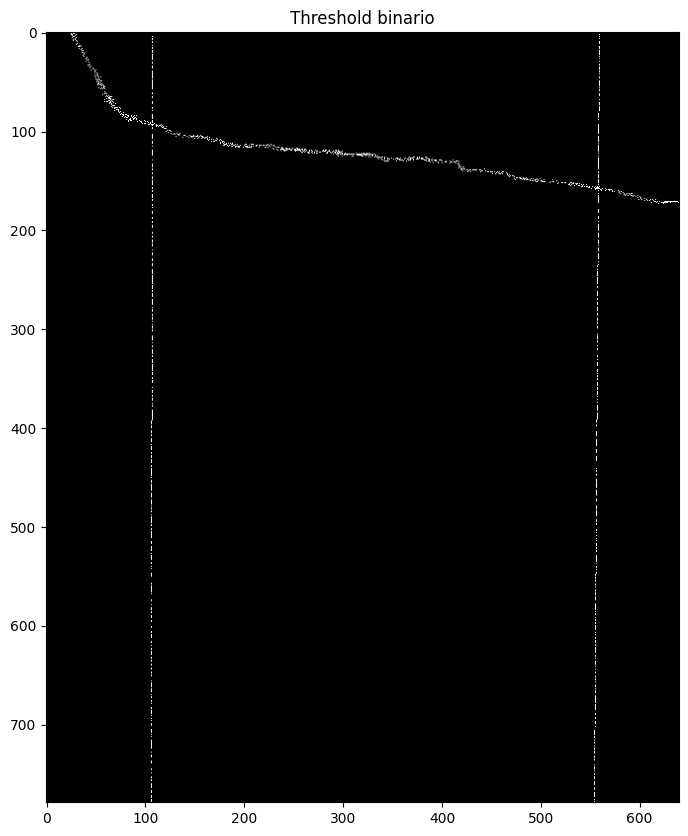

In [15]:
ret, thresh = cv2.threshold(mascara, 254, 255, cv2.THRESH_BINARY)
imshow("Threshold binario", thresh)

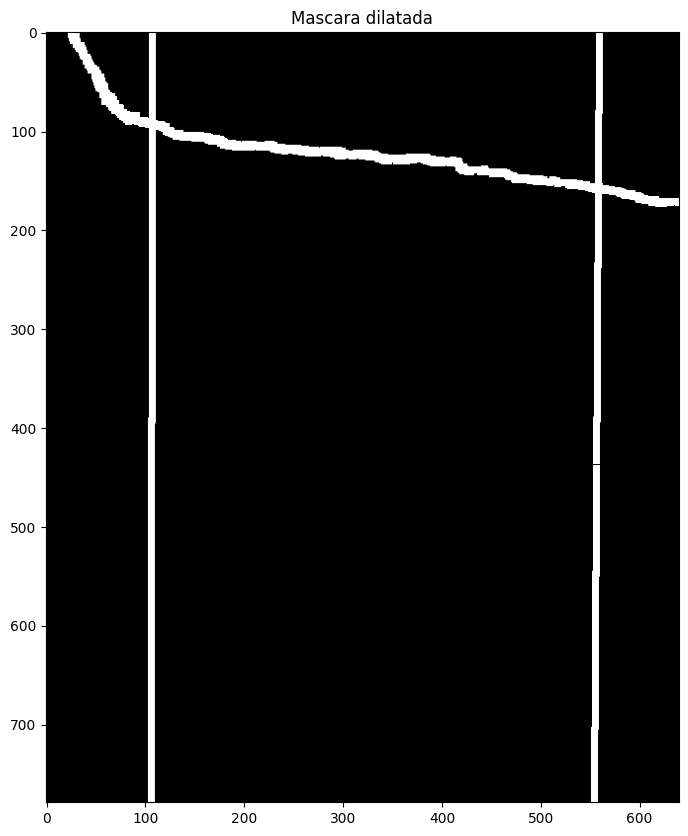

True

In [20]:
kernel = np.ones((7,7), np.uint8)
mask = cv2.dilate(thresh, kernel, iterations= 1)
imshow("Mascara dilatada", mask)
cv2.imwrite("imagemMaskDilatada.png", mask)

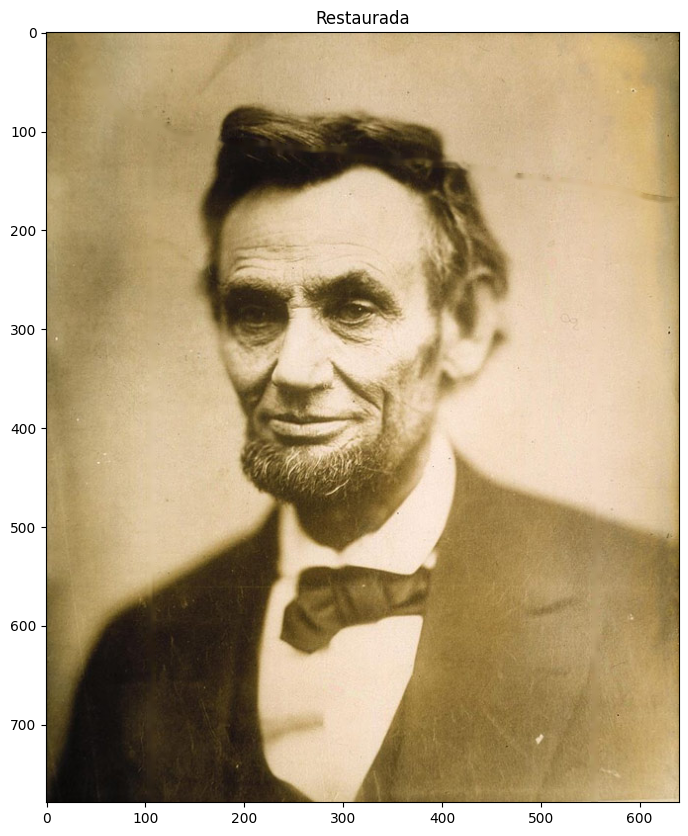

In [23]:
restaurada = cv2.inpaint(image, mask, 3, cv2.INPAINT_TELEA)

imshow("Restaurada", restaurada)